<a href="https://colab.research.google.com/github/RealMyeong/Aiffel_Exploration/blob/main/EX_BS2_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 당뇨병 수치 맞추기

## 1. 데이터 가져오기

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [2]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## 2. 모델에 입력할 데이터 X 준비하기

In [3]:
df_x = diabetes.data

print(df_x.shape)

(442, 10)


## 3. 모델에 예측할 데이터 y준비하기

In [4]:
df_y = diabetes.target

print(df_y.shape)

(442,)


## 4. train, test데이터로 나누기

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=8)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(353, 10) (89, 10)
(353,) (89,)


## 5. 모델 준비하기

In [6]:
# feature의 갯수에 맞는 w, b 정하기
import numpy as np

W = np.random.rand(10)
b = np.random.rand()

print(W)
print(b)

[0.48189523 0.7698449  0.09102556 0.63017124 0.18823637 0.32421286
 0.36940783 0.96580178 0.30761194 0.50605912]
0.9775346113778699


In [7]:
# model 준비하기

def model(X, W, b):
  prediction = 0
  for i in range(len(W)):
    prediction = prediction + X[:,i] * W[i]
  prediction = prediction + b
  return prediction
  


## 6. 손실함수 loss정의하기

In [8]:
# 손실함수 MSE로 정의하기
# MSE함수 정의
def MSE(a, b):
  mse = ((a-b)**2).mean()
  return mse

def RMSE(a, b):
  rmse = np.sqrt(((a-b)**2).mean())
  return rmse


#손실함수 정의
def loss(X, W, b, y):
  predictions = model(X, W, b)
  L = RMSE(predictions, y) #손실
  return L

## 7. 기울기를 구하는 gradient 함수 구현하기

In [9]:
def gradient(X, W, b, y):
  # 가중치 개수
  N = len(W)

  #y_pred 준비
  y_pred = model(X, W, b)

  #dw 계산
  dw = 1/N * 2 * X.T.dot(y_pred - y)

  #db 계산
  db = (2 * (y_pred - y)).mean()

  return dw, db


## 8. 학습률 설정하기

In [10]:
learning_rate = 0.5


In [11]:
'''#R-Squre 함수 정의
def rsqr(a, b):
  rsqr = sum((a-b)**2)/sum((b-b.mean())**2)
  return rsqr


#손실함수 정의
def loss(X, W, b, y):
  predictions = model(X, W, b)
  L = rsqr(predictions, y) #손실
  return L


def gradient_rsqr(X, W, b, y):
  N = len(W)
  #y_pred 준비
  y_pred = model(X, W, b)

  #dw 계산
  dw = (2 * X.T.dot(y_pred - y) / sum((y-y.mean())**2))

  #db 계산
  db = sum((2 * (y_pred - y))/sum((y-y.mean())**2))

  return dw, db


losses = []

for i in range(1, 10000):
  dw, db = gradient_rsqr(X_train, W, b, y_train)
  W -= learning_rate*dw
  b -= learning_rate*db
  L = loss(X_train, W, b, y_train)
  losses.append(L)
  if i % 100 == 0 :
    print('Iteration %d : Loss %.4f' %(i, L))'''

"#R-Squre 함수 정의\ndef rsqr(a, b):\n  rsqr = sum((a-b)**2)/sum((b-b.mean())**2)\n  return rsqr\n\n\n#손실함수 정의\ndef loss(X, W, b, y):\n  predictions = model(X, W, b)\n  L = rsqr(predictions, y) #손실\n  return L\n\n\ndef gradient_rsqr(X, W, b, y):\n  N = len(W)\n  #y_pred 준비\n  y_pred = model(X, W, b)\n\n  #dw 계산\n  dw = (2 * X.T.dot(y_pred - y) / sum((y-y.mean())**2))\n\n  #db 계산\n  db = sum((2 * (y_pred - y))/sum((y-y.mean())**2))\n\n  return dw, db\n\n\nlosses = []\n\nfor i in range(1, 10000):\n  dw, db = gradient_rsqr(X_train, W, b, y_train)\n  W -= learning_rate*dw\n  b -= learning_rate*db\n  L = loss(X_train, W, b, y_train)\n  losses.append(L)\n  if i % 100 == 0 :\n    print('Iteration %d : Loss %.4f' %(i, L))"

## 9. 모델 학습하기

In [12]:
losses = []

for i in range(1, 1001):
  dw, db = gradient(X_train, W, b, y_train)
  W -= learning_rate*dw
  b -= learning_rate*db
  L = loss(X_train, W, b, y_train)
  losses.append(L)
  if i % 10 == 0 :
    print('Iteration %d : Loss %.4f' %(i, L))

Iteration 10 : Loss 55.9712
Iteration 20 : Loss 54.2774
Iteration 30 : Loss 53.9414
Iteration 40 : Loss 53.8617
Iteration 50 : Loss 53.8376
Iteration 60 : Loss 53.8274
Iteration 70 : Loss 53.8214
Iteration 80 : Loss 53.8167
Iteration 90 : Loss 53.8126
Iteration 100 : Loss 53.8088
Iteration 110 : Loss 53.8050
Iteration 120 : Loss 53.8013
Iteration 130 : Loss 53.7977
Iteration 140 : Loss 53.7942
Iteration 150 : Loss 53.7907
Iteration 160 : Loss 53.7872
Iteration 170 : Loss 53.7838
Iteration 180 : Loss 53.7804
Iteration 190 : Loss 53.7771
Iteration 200 : Loss 53.7738
Iteration 210 : Loss 53.7705
Iteration 220 : Loss 53.7673
Iteration 230 : Loss 53.7642
Iteration 240 : Loss 53.7611
Iteration 250 : Loss 53.7580
Iteration 260 : Loss 53.7549
Iteration 270 : Loss 53.7519
Iteration 280 : Loss 53.7490
Iteration 290 : Loss 53.7461
Iteration 300 : Loss 53.7432
Iteration 310 : Loss 53.7403
Iteration 320 : Loss 53.7375
Iteration 330 : Loss 53.7347
Iteration 340 : Loss 53.7320
Iteration 350 : Loss 53

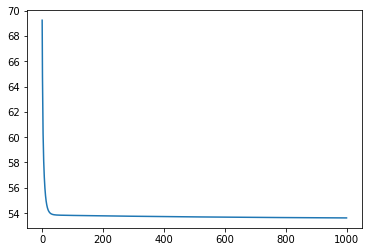

In [13]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [14]:
W, b, dw, db

(array([   2.46965763, -268.68260583,  528.56677447,  369.23306366,
        -540.37587279,  221.61775122,  -39.69845098,  183.80654723,
         566.52004633,  106.16160611]),
 152.04428851085495,
 array([ 6.62694617e-03,  5.22898594e-03,  6.69998838e-03,  4.39564786e-04,
         6.64283794e-01, -5.30117626e-01, -2.90934982e-01, -7.79079312e-02,
        -2.45744791e-01, -8.65231591e-04]),
 2.8112935315710497e-06)

## 10. test데이터에 대한 성능 확인하기

In [15]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

53.90476872723714

## 11. 정답 데이터와 예측한 데이터 시각화 하기

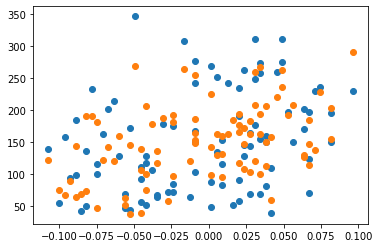

In [16]:
plt.scatter(X_test[:,0], y_test)  #X_test[:,0] -> 모든 행에 대해서 나이부분 값
plt.scatter(X_test[:,0], prediction)
plt.show()

# 자전거 타는 사람 수 예측

## 1. 데이터 가져오기

In [17]:
import pandas as pd
import numpy as np

data_path = '/content/drive/MyDrive/캐글_필사/.kaggle/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')


In [18]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [19]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## 2. datatime 컬럼을 datetime 자료형으로 변환하고 연,월,일,시,분,초 6개의 칼럼 생성하기

In [21]:
train['date'] = train['datetime'].apply(lambda x : x.split()[0])

train['year'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[2])

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00


## 3. year, month, day, hour, minute, second 데이터 개수 시각화하기




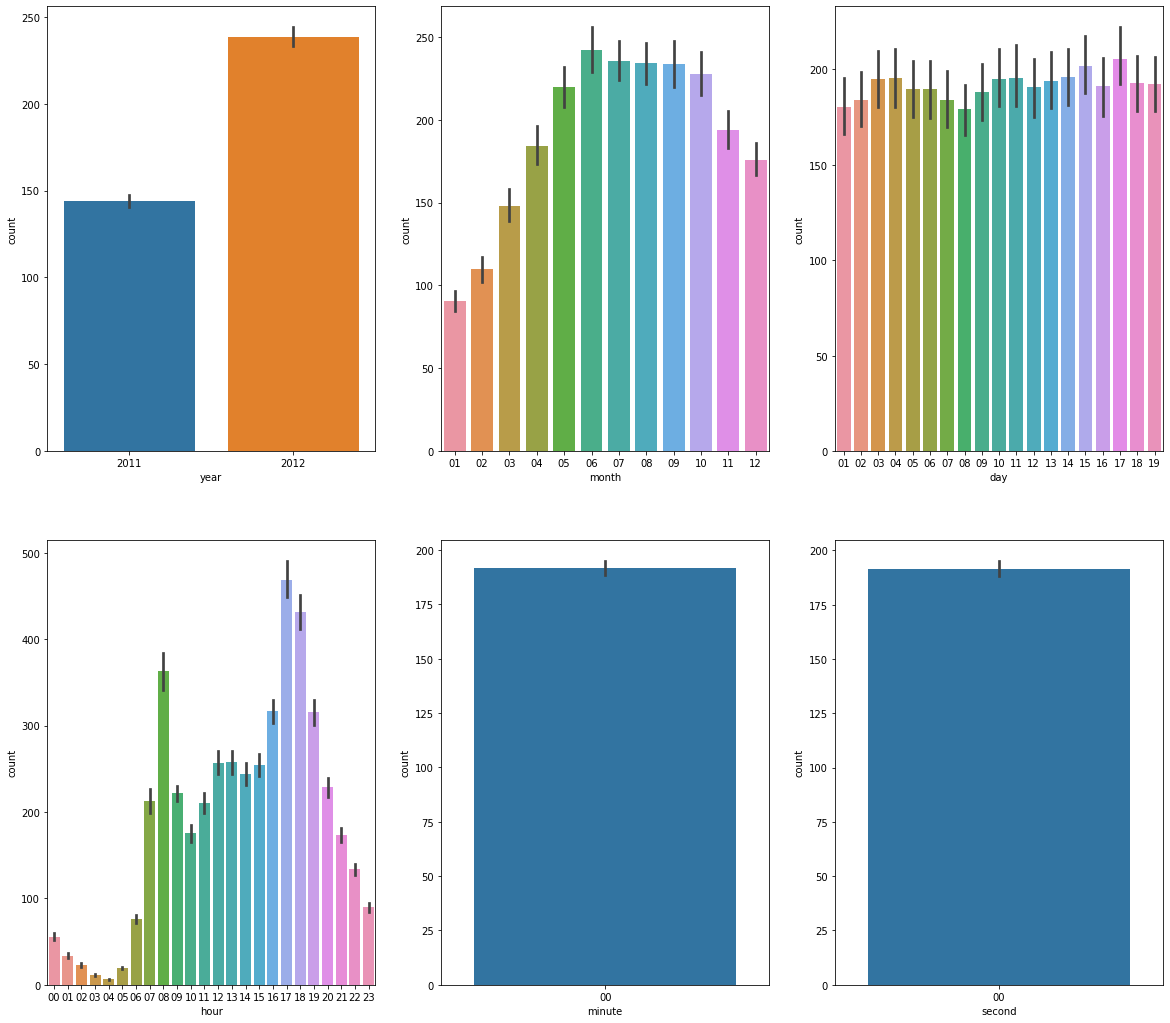

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl 

%matplotlib inline

f, ax = plt.subplots(2, 3, figsize = (20, 18))
sns.barplot(x=train['year'], y=train['count'], ax=ax[0,0])
sns.barplot(x=train['month'], y=train['count'], ax=ax[0,1])
sns.barplot(x=train['day'], y=train['count'], ax=ax[0,2])
sns.barplot(x=train['hour'], y=train['count'], ax=ax[1,0])
sns.barplot(x=train['minute'], y=train['count'], ax=ax[1,1])
sns.barplot(x=train['second'], y=train['count'], ax=ax[1,2])

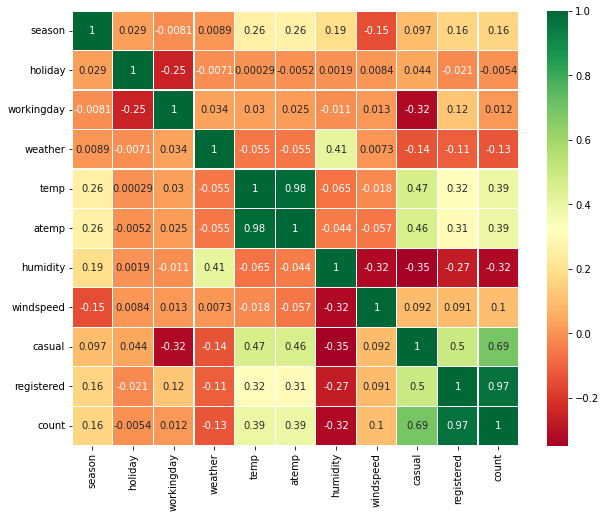

In [23]:
sns.heatmap(train.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- temp와 atemp의 상관관계가 0.98이라 두 데이터 모두는 필요 없어보임
- temp나 atemp만 써도 될 것 같다.

In [24]:
#temp 구간나누기
train['temp_band'] = pd.qcut(train['temp'], 4)
train.groupby(['temp_band'])['count'].mean().to_frame().style.background_gradient(cmap='summer_r')

,count
temp_band,
"(0.819, 13.94]",103.200615
"(13.94, 20.5]",172.143595
"(20.5, 26.24]",216.393254
"(26.24, 41.0]",284.861469


In [25]:
train['temp_cat'] = 0
train.loc[train['temp']<=13.94, 'temp_cat'] = 0
train.loc[(train['temp']>13.94)&(train['temp']<=20.5), 'temp_cat'] = 1
train.loc[(train['temp']>20.5)&(train['temp']<=26.24), 'temp_cat'] = 2
train.loc[(train['temp']>26.24)&(train['temp']<=41.0), 'temp_cat'] = 3

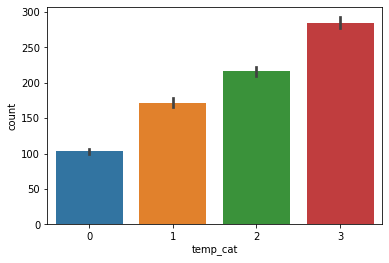

In [26]:
sns.barplot(x=train['temp_cat'], y=train['count'])
plt.show()

temp_cat이 커지며 count가 커지므로 학습에 쓸만한 데이터인것같다.

- 필요없는 피처 없애기

In [27]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,date,year,month,day,hour,minute,second,temp_band,temp_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,16,2011-01-01,2011,01,01,00,00,00,"(0.819, 13.94]",0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,40,2011-01-01,2011,01,01,01,00,00,"(0.819, 13.94]",0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,32,2011-01-01,2011,01,01,02,00,00,"(0.819, 13.94]",0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,13,2011-01-01,2011,01,01,03,00,00,"(0.819, 13.94]",0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,1,2011-01-01,2011,01,01,04,00,00,"(0.819, 13.94]",0


In [28]:
train = train[train['weather']!=4]

In [29]:
drop_features = ['casual', 'atemp', 'datetime', 'date', 'windspeed', 'month', 'temp_band', 'registered']
train = train.drop(drop_features, axis=1)

In [30]:
test['temp_cat'] = 0
test.loc[test['temp']<=13.94, 'temp_cat'] = 0
test.loc[(test['temp']>13.94)&(test['temp']<=20.5), 'temp_cat'] = 1
test.loc[(test['temp']>20.5)&(test['temp']<=26.24), 'temp_cat'] = 2
test.loc[(test['temp']>26.24)&(test['temp']<=41.0), 'temp_cat'] = 3

In [31]:
test['date'] = test['datetime'].apply(lambda x : x.split()[0])

test['year'] = test['datetime'].apply(lambda x : x.split()[0].split('-')[0])
test['month'] = test['datetime'].apply(lambda x : x.split()[0].split('-')[1])
test['day'] = test['datetime'].apply(lambda x : x.split()[0].split('-')[2])
test['hour'] = test['datetime'].apply(lambda x : x.split()[1].split(':')[0])
test['minute'] = test['datetime'].apply(lambda x : x.split()[1].split(':')[1])
test['second'] = test['datetime'].apply(lambda x : x.split()[1].split(':')[2])

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,temp_cat,date,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,2011-01-20,2011,01,20,00,00,00
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,0,2011-01-20,2011,01,20,01,00,00
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,0,2011-01-20,2011,01,20,02,00,00
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,0,2011-01-20,2011,01,20,03,00,00
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,0,2011-01-20,2011,01,20,04,00,00


In [32]:
drop_features = ['atemp', 'datetime', 'date', 'windspeed', 'month']
test = test.drop(drop_features, axis=1)

## 4. x, y컬럼 선택과 train/test 데이터 분리

In [33]:
y = train['count']
train = train.drop('count', axis=1)
X_train = train
X_test = test

## 5. LinearRegression 모델 학습

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y)
y_pred = model.predict(X_train)

In [35]:
X_train.shape, y.shape, y_pred.shape, X_test.shape

((10885, 12), (10885,), (10885,), (6493, 12))

## 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [36]:
#평가지표 계산 함수 정의
def r2_square(y, y_pred):
  loss = sum((y-y_pred)**2) / sum((y-y.mean())**2)
  return loss

def mse(y, y_pred):
  
  loss = np.mean((y-y_pred)**2)
  return loss

def rmse(y, y_pred):
  loss = np.sqrt(mse(y, y_pred))
  return loss

In [37]:
print(f'선형회귀의 r2_square값 : {r2_square(y, y_pred):.4f}')
print(f'선형회귀의 mse값 : {mse(y, y_pred):.4f}')
print(f'선형회귀의 rmse값 : {rmse(y, y_pred):.4f}')

선형회귀의 r2_square값 : 0.6137
선형회귀의 mse값 : 20137.3749
선형회귀의 rmse값 : 141.9062


## 7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y)
y_pred_2 = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


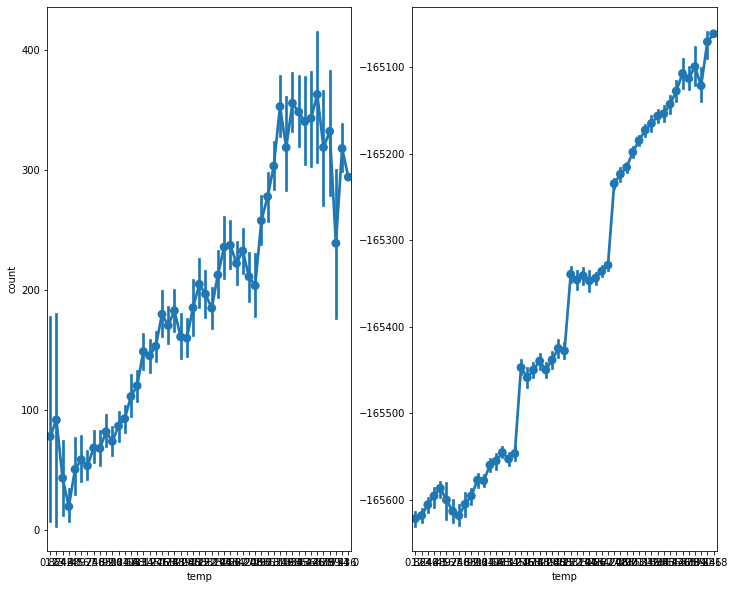

In [39]:
f, ax = plt.subplots(1, 2, figsize=(12,10))
point1 = sns.pointplot(x='temp', y= y, data=train, ax=ax[0]) 
point2 = sns.pointplot(x='temp', y= y_pred_2, data=test, ax=ax[1]) 

# 회고

In [ ]:
'''# feature의 갯수에 맞는 w, b 정하기
import numpy as np

W = np.random.rand(10)
b = np.random.rand()

print(W)
print(b)

# model 준비하기

def model(X, W, b):
  prediction = 0
  for i in range(10):
    prediction = prediction + X[:,i] * W[i]
  prediction = prediction + b
  return prediction


#R-Squre 함수 정의
def rsqr(a, b):
  rsqr = sum((a-b)**2)/sum((b-b.mean())**2)
  return rsqr


#손실함수 정의
def loss(X, W, b, y):
  predictions = model(X, W, b)
  L = rsqr(predictions, y) #손실
  return L


def gradient_rsqr(X, W, b, y):
  N = len(W)
  #y_pred 준비
  y_pred = model(X, W, b)

  #dw 계산
  dw = 1/N * (2 * X.T.dot(y_pred - y) / sum((y-y.mean())**2))

  #db 계산
  db = 1/N * ((2 * (y_pred - y))/sum((y-y.mean())**2))

  return dw, db


losses = []

for i in range(1, 1001):
  dw, db = gradient_rsqr(X_train, W, b, y_train)
  W -= learning_rate*dw
  b -= learning_rate*db
  L = loss(X_train, W, b, y_train)
  losses.append(L)
  if i % 10 == 0 :
    print('Iteration %d : Loss %.4f' %(i, L))'''